# Reinforcement Learning
 

<font color="blue">Author:Ketki Savle </font>

# I. Overview

The objective of this function is to implement Reinforcement learning using Python 3. 
We will implement Maze and Blackjack using Reinforcement learning. 


In Reinforcement Learning, a software agent makes observations and takes actions within an
environment, and in return it receives rewards.Its objective is to learn to act in a way that will maximize
its expected long-term rewards.


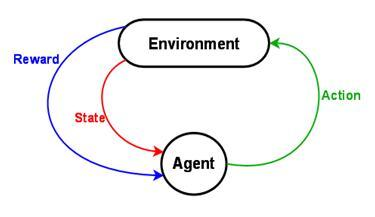



# II. Problems 

## A. Maze Problem (Practice)

<b> Description of the maze problem </b>

A maze of size nXn, with one goal position, starting from any random position in the maze, an agent has to reach to the goal position.

The agent is experimenting and exploiting past experiences (episodes) in order to achieve its goal. It may fail again and again, but hopefully, after lots of trial and error (rewards and penalties) it will arrive to the solution of the problem. The solution will be reached if the agent finds the optimal sequence of states in which the accumulated sum of rewards is maximal (in short, we lure the agent to accumulate a maximal reward, and while doing so, he actually solves our problem). Note that it may happen that in order to reach the goal, the agent will have to endure many penalties (negative rewards) on its way

In our environment we have "O" as free space to move between, "H" denoted as wall and "G as goal. 




In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [2]:
#%%bash 
#cat grid.txt
np.genfromtxt('grid.txt')

array([nan, nan, nan, nan, nan, nan, nan])

<b> Creating text space for this game: </b>

Here we have created a grid.txt file with the array of letters as given in the problem. 
We shall use this text format as a maze problem. getting the way out will be the goal to gain maximum rewards. 

### GridWorld Class


In [3]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

<b> Explanation of GridWorld class</b>

The class above mentions the environment of the maze problem in python. In the Maze problem the agent can move in four directions: left , right, top, bottom. 

First, we initialize the environment for the game and since we are doing this woth text at this point of time, we will use array. The coordinates show the 4 possible movements in those directions as mentioned above. 

After defining the states we start the environment. The rules needs to be defined for scoring before we start training the agent. Further the if else loop shows how to score the movement of agent. If the agent hits the wall then he will be peanalized y 5 points and once he reaches the goal, he will be rewarded by 30 points. 



In [4]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [5]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## RLAgent for Maze
 

<b> 

Choice of Algorithm: 

Algorithm: Q-Learning & SARSA </b>

The exploration factor epsilon is the the frequency level of how much exploration to do. It is usually set to 0.1, which roughly means that in one of every 10 moves the agent takes a completely random action. There are however many other usage schemes you can try (you can even tune epsilon during training!)

**[Algorithm: Q-learning]**
![](http://incompleteideas.net/book/ebook/pseudotmp9.png)



SARSA stands for State-Action-Reward-State-Action.

**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)



<b> Q-Learning vs SARSA and why SARSA? </b>

In SARSA, the agent starts in state 1, performs action 1, and gets a reward (reward 1). Now, it’s in state 2 and performs another action (action 2) and gets the reward from this state (reward 2) before it goes back and updates the value of action 1 performed in state 1. In contrast, in Q-learning the agent starts in state 1, performs action 1 and gets a reward (reward 1), and then looks and sees what the maximum possible reward for an action is in state 2, and uses that to update the action value of performing action 1 in state 1. So the difference is in the way the future reward is found. In Q-learning it’s simply the highest possible action that can be taken from state 2, and in SARSA it’s the value of the actual action that was taken.

This means that SARSA takes into account the control policy by which the agent is moving, and incorporates that into its update of action values, where Q-learning simply assumes that an optimal policy is being followed

Written out, the Q-learning update policy is Q(s, a) = reward(s) + alpha * max(Q(s')), and the SARSA update policy is Q(s, a) = reward(s) + alpha * Q(s', a'). This is how SARSA is able to take into account the control policy of the agent during learning. It means that information needs to be stored longer before the action values can be updated, but also means that our agent is going to hit the wall and fail much less frequently

<b> Explore - Exploit dilemma? Use Epsilon: </b>

Two reasons to take an action in RL
1. Exploitation: To try to get reward. We exploit our
current knowledge to get a payoff.
2. Exploration: Get more information about the world.
How do we know if there is not a pot of gold around the
corner.


To resolve the dilemma of explore exploit, the algorithm we can use is called the epsilon-Greedy algorithm. In computer science, a greedy algorithm is an algorithm that always takes whatever action seems best at the present moment, even when that decision might lead to bad long term consequences. The epsilon-Greedy algorithm is almost a greedy algorithm because it generally exploits the best available option, but every once in a while the epsilon-Greedy algorithm explores the other available options


The reason for this method to choose :

(1) The method does not require to memorize any exploration specific data

(2) Its known to achieve near optimal results in many applications by the
hand-tuning of only a single parameter

The advantage of the ε-greedy policy (compared to a completely random policy) is
that it will spend more and more time exploring the interesting parts of the environment, as the Q-Value
estimates get better and better, while still spending some time visiting unknown regions of the MDP. It is
quite common to start with a high value for ε (e.g., 1.0) and then gradually reduce it (e.g., down to 0.05).

<b> Implementation of epsilon greedy </b>

In [33]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    
    #def greedy(Q, s):
        #return np.argmax(Q[s]) # greedy action selection
    
    #def epsilon_greed(self,Q, s, epsilon):
        #self.epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
        #self.epsilon = 0.1
        #self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
        # tabular approximation
        #self.s = 1000 #number of steps we would like to take at this point.
        #if np.random.rand() < self.epsilon:
            #return np.random.randint(self.n_a)
        #else:
            #return greedy(Q,s)
        
    def epsilon_greed(self,Q, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]])
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0 # . 
        self.Q[self.env._map == 'H'] = -np.inf
        
        


        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
             # tabular approximation
            
            s = env.get_cur_state()
            
            # selection an action
            a = self.epsilon_greed(self.Q,epsilon,s)
           
            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                
                s1 = env.get_cur_state()
               
                a1 = self.epsilon_greed(self.Q, epsilon,s1)
                
                
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0],s[1], a] += alpha * (r + gamma * self.Q[s[0],s[1], a1] - self.Q[s[0],s[1],a])
                
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    #guess: this is to initialize the q value with zero as this is the first iteration
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory
    #epsilon = 0
    def test(self, start, maxstep=1000, epsilon = 0):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        # parameters
        #gamma = params.pop('gamma', 0.99)
        #gamma = params.pop('gamma', 0.99)
        #alpha = params.pop('alpha', 0.1)
       #epsilon= params.pop('epsilon', 0.1)
        #maxiter= params.pop('maxiter', 1000) 
        #maxstep= params.pop('maxstep', 1000)
       
        env.init(start)
             # tabular approximation
            
        s = env.get_cur_state()
            
            # selection an action
        a = self.epsilon_greed(self.Q,epsilon,s)
        trace = np.array(coord_convert(s, self.size))
        
        # init self.Q matrix
        #self.Q[...] = 0 # . 
        #self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        #rtrace = []
        #steps = []
        # tabular approximation
        #Q = np.random.rand(n_states, n_actions)
        for step in range(maxstep):
             
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(self.Q, epsilon,s1)

           # rewards.append(r)
            trace = np.vstack((trace, coord_convert(s1, self.size)))

            if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    
                self.Q[s1[0], s1[1], a1] = 0
                break

            s = s1
            a = a1

           # rtrace.append(np.sum(rewards))
            #steps.append(step+1)
        return trace # last trace of trajectory
   
        

       # return trace

<b> Questions:</b>

#TODO: Why is this zero?
 
 
 if env.is_goal(): # reached the goal
                    
                    
       self.Q[s1[0], s1[1], a1] = 0
               

Here the goal will be set to zero as we do not want to get stuck in the achieved goal and ofcourse would move on to learn further. This way the agent will go to the new state and perform set of actions again to go from one state to another and learn further while achieving new goal. 

<b> Class RL Agent </b>

In the above class we use mainly three functions. To initialize the environment in which the agent will be performing. Use the epsilon greedy algorithm for learning and train - test functions for training the agent and performing the test respectively to see how he performs. 

As described above, the agent will be learning through SARSA and the Q value table will be updated for the rewards. 
Here whenever agent wants to go from one state to another, it chooses an action and there is a reward associated with every action. Such details of gaining rewards after choosing a particular action would be stored in Q table. 

As the agent plays more number of games by exploring the environment, more number of records will be updated in Q table. Thus next time the agent knows what will happen if he chooses a particular action to go from one state to another.

This helps in reinforced learning and better performance. 

The parameters given in train functions are for the agents learning rate. 

gamma = discount rate 
alpha = learning rate 
epsilon= greedy
maxiter= maximum number of iterations to perform  
maxstep= maximum number of steps to perform especially in test 




### Utility functions for Plotting

- finish the TODOs here for plotting

In [7]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    plt.plot(rtrace)
    
    
    plt.ylabel("sum of rewards")
    #plt.show()
    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("# steps")
    #plt.show()
    
    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

In [8]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000) 

Here we are simply creating the object agent for RLAgent class and shall run the code for rtrace, steps and trace that our functions are returning with the learning parameter values. 

To tackle the credit assignment problem, where we need to understand exactly which action to be rewarded amongst many that habe been taken by agent,we use a common strategy which is to evaluate an action based on the sum of all the rewards that
come after that action, usually applying a discount rate r at each step. Typical discount rates are 0.95 or 0.99. With a discount rate of 0.95 or 0.99 we will choose the parameter to see the long or short term efect depending on the number of steps we are taking here to play the game. 

The epsilon value could range between 0.05 to 1.0 and here we have chosen 0.1 as this is the appropriate number for our numeric calculation. 


Maxiter, when increased, the algorithm runs slow and thus for now we can proceed with 100. 

For better exploration we will keep maxstep as 1000. 

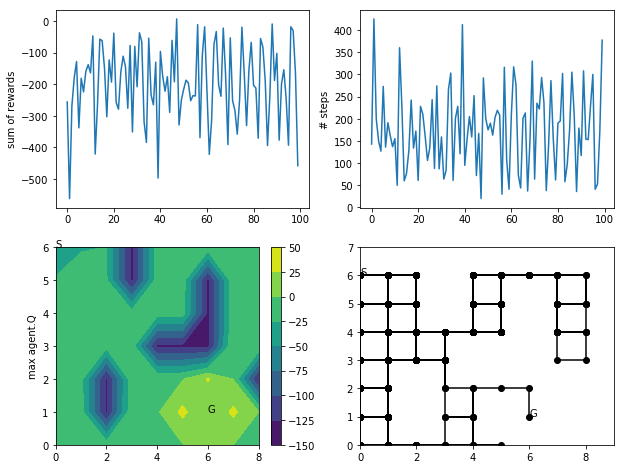

In [9]:
plot_train(agent, rtrace, steps, trace, start)

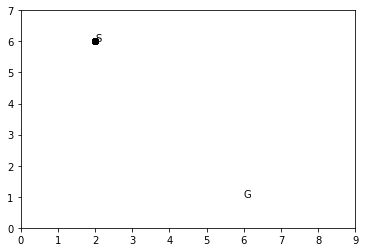

In [10]:
test_start = [0,2]
#rtrace, steps, test_trace = agent.test(test_start)
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
#print(test_trace)


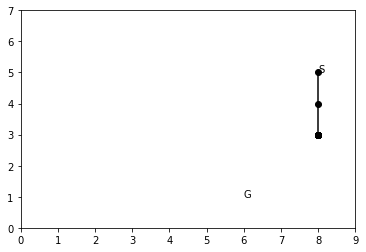

In [11]:
test_start = [1,8]
#rtrace, steps, test_trace = agent.test(test_start)
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
#print(test_trace)

Experimenting: 

In [12]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.95, 
                                   alpha=0.1, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

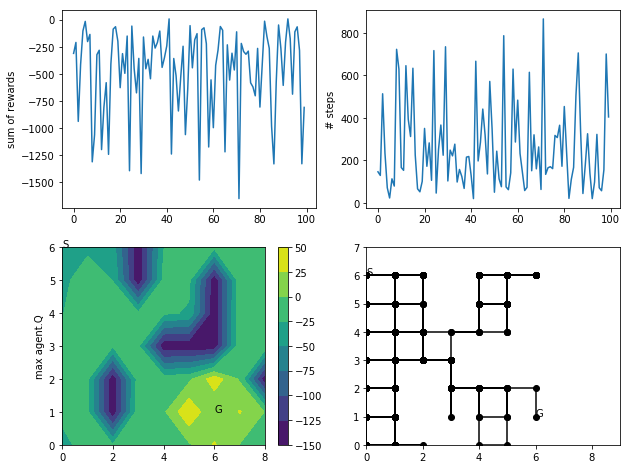

In [13]:
plot_train(agent, rtrace, steps, trace, start)

In [18]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.05, 
                                   maxiter=1000, 
                                   maxstep=1000)

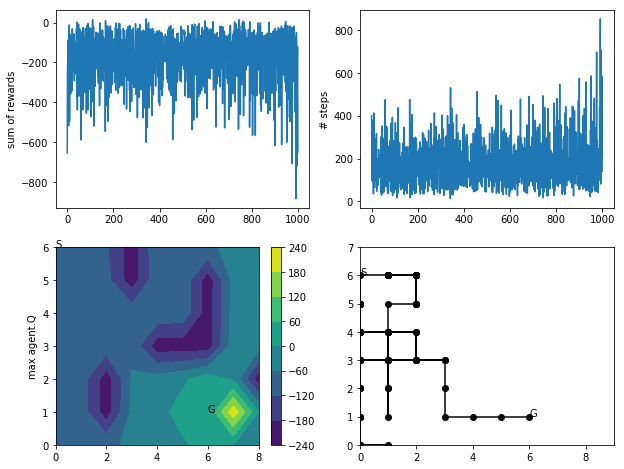

In [19]:
plot_train(agent, rtrace, steps, trace, start)

In [20]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.03, 
                                   epsilon=0.9, 
                                   maxiter=100, 
                                   maxstep=1000)

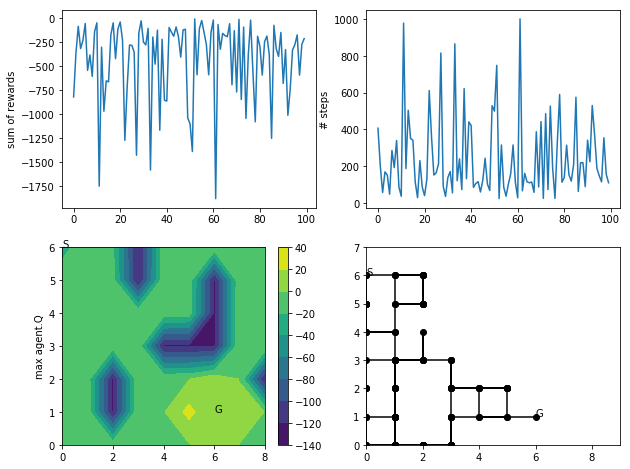

In [21]:
plot_train(agent, rtrace, steps, trace, start)

In [22]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.2, 
                                   epsilon=0.7, 
                                   maxiter=100, 
                                   maxstep=1000)

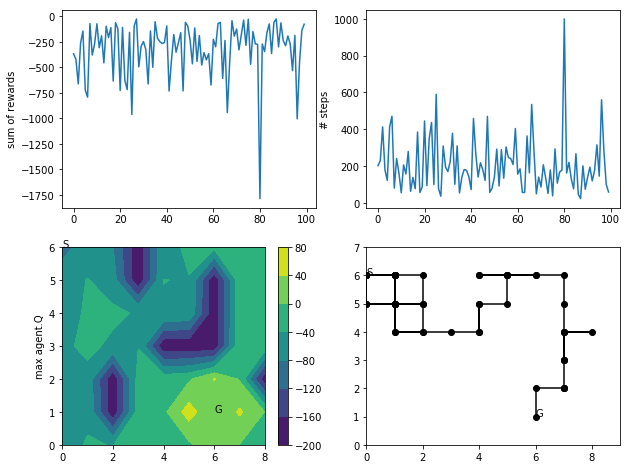

In [23]:
plot_train(agent, rtrace, steps, trace, start)

<b> What are these plots saying? </b>


We have experimented with different learning parameters in the above charts. The interesting thing here to observe would be, the number of times we run the code, the graph will change. Our agent will be punished at the beginning for making bad choices but eventually after playing many games he will learn better and the trajectory towards goal will improve. 


The above parameters look acceptable as the sum of the reward will be more than before. 

<b> From the professor's output </b>

The graph which professor has provided shows that the agent at the beginning is getting higher rewards than the later part. As the graph has higher values on Y axis. The trajectory is a lot more cleaner than otherwise., 

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


<b> BlackJack card game </b>

The logic of blackjack is simple, but is sufficiently complex that we can gain valuable experience for making more complicated games later on. As we said, this engine has several simplifications as compared to a commercial Blackjack platform:

* It will be entirely text based.
* It will have just a single player, and the dealer.
* It will have no gambling system.

<b>The rules of blackjack are as follows:</b>

* The player and the dealer receive two cards from a shuffled deck. In our case, we'll use a single deck, though casinos usually use a 'shoe' consisting of six decks.


* After the first two cards are dealt to dealer and player, the player is asked if they'd like another card (called 'hitting'), or if they are happy with the cards they have already (called 'staying'). The object is to make the sum of your card values as close to 21, without going over. If we make 21 exactly, we have blackjack, which can't be beat. If we go over 21, we 'bust' and we lose the round. The player is allowed to stop hitting at any point.


* The number cards (2 through 10) are worth the number displayed, face cards are worth 10, and an Ace can be worth either 1 or 11. For example, if our first two cards are a Jack and an Ace, we'd want to count the Ace as 11 since 10 + 11 = 21 and we'd have blackjack, but, if we had already had a hand worth 18, decided to hit, and got an Ace, we'd want to count it as 1, since counting it as 11 would put us at 29 and we'd bust.


* Once our hand is finished, the dealer tries to do the same. The dealer must keep hitting until they get to 17. If they get above 17 without busting, they can stay.



Below is the code that takes care of blackjack environment: 

In [30]:
import gym

from gym import spaces

from gym.utils import seeding



def cmp(a, b):

    return float(a > b) - float(a < b)



# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10

deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]





def draw_card(np_random):

    return int(np_random.choice(deck))





def draw_hand(np_random):

    return [draw_card(np_random), draw_card(np_random)]





def usable_ace(hand):  # Does this hand have a usable ace?

    return 1 in hand and sum(hand) + 10 <= 21





def sum_hand(hand):  # Return current hand total

    if usable_ace(hand):

        return sum(hand) + 10

    return sum(hand)





def is_bust(hand):  # Is this hand a bust?

    return sum_hand(hand) > 21





def score(hand):  # What is the score of this hand (0 if bust)

    return 0 if is_bust(hand) else sum_hand(hand)





def is_natural(hand):  # Is this hand a natural blackjack?

    return sorted(hand) == [1, 10]





class BlackjackEnv(gym.Env):

    """Simple blackjack environment



    Blackjack is a card game where the goal is to obtain cards that sum to as

    near as possible to 21 without going over.  They're playing against a fixed

    dealer.

    Face cards (Jack, Queen, King) have point value 10.

    Aces can either count as 11 or 1, and it's called 'usable' at 11.

    This game is placed with an infinite deck (or with replacement).

    The game starts with each (player and dealer) having one face up and one

    face down card.



    The player can request additional cards (hit=1) until they decide to stop

    (stick=0) or exceed 21 (bust).



    After the player sticks, the dealer reveals their facedown card, and draws

    until their sum is 17 or greater.  If the dealer goes bust the player wins.



    If neither player nor dealer busts, the outcome (win, lose, draw) is

    decided by whose sum is closer to 21.  The reward for winning is +1,

    drawing is 0, and losing is -1.



    The observation of a 3-tuple of: the players current sum,

    the dealer's one showing card (1-10 where 1 is ace),

    and whether or not the player holds a usable ace (0 or 1).



    This environment corresponds to the version of the blackjack problem

    described in Example 5.1 in Reinforcement Learning: An Introduction

    by Sutton and Barto (1998).

    http://incompleteideas.net/sutton/book/the-book.html

    """

    def __init__(self, natural=False):

        self.action_space = spaces.Discrete(2)

        self.observation_space = spaces.Tuple((

            spaces.Discrete(32),

            spaces.Discrete(11),

            spaces.Discrete(2)))

        self.seed()



        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules

        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/

        self.natural = natural

        # Start the first game

        self.reset()



    def seed(self, seed=None):

        self.np_random, seed = seeding.np_random(seed)

        return [seed]



    def step(self, action):# will generate the next state based on action hit or miss . 

        assert self.action_space.contains(action)

        if action:  # hit: add a card to players hand and return

            self.player.append(draw_card(self.np_random))

            if is_bust(self.player):

                done = True

                reward = -1

            else:

                done = False

                reward = 0

        else:  # stick: play out the dealers hand, and score

            done = True

            while sum_hand(self.dealer) < 17:

                self.dealer.append(draw_card(self.np_random))

            reward = cmp(score(self.player), score(self.dealer))

            if self.natural and is_natural(self.player) and reward == 1:

                reward = 1.5

        return self._get_obs(), reward, done, {}



    def _get_obs(self):

        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))



    def reset(self):

        self.dealer = draw_hand(self.np_random)

        self.player = draw_hand(self.np_random)

        return self._get_obs()

<B> What does this environment say? </b> 

As mentioned above, we have learnt the rules of the game already!! This class taken from Github is an environment used for blackjack. This environment is nothing but the rules that are programmed for us to train our agent to get maximum rewards while playing against the dealer. 

We need to understand that there are observations that we will use and step will be our goal. 

There are 2 actions hit or stick that we will use in this game. The step function has our goal and that is Done. The aim of the agent will be to win maximum bets. 



In [31]:
new_env = BlackjackEnv()

In [32]:
class BlackJackAgent: 
    
    def __init__(self, new_evn):
        #self.env = env
        self.n_a = 2 # hit or not
        # self.Q table including the surrounding border
        self.Q = np.zeros((32,11,2,2))
        
    def epsilon_greed(self,Q, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1],s[2]])
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        

        rtrace = []
        steps = []
        self.win = 0 
        self.loss = 0
        self.draw = 0

    def print_observation(observation):
        score, dealer_score, usable_ace = observation
        print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
              score, usable_ace, dealer_score))

    def strategy(observation):
        score, dealer_score, usable_ace = observation
        # Stick (action 0) if the score is > 20, hit (action 1) otherwise
        return 0 if score >= 20 else 1

    for i_episode in range(20):
        observation = new_env.reset()
        for t in range(100):
            print_observation(observation)
            action = strategy(observation)
            print("Taking action: {}".format( ["Stick", "Hit"][action]))
            observation, reward, done, _ = new_env.step(action)
            if done:
                print_observation(observation)
                print("Game end. Reward: {}\n".format(float(reward)))
                break   

Player Score: 13 (Usable Ace: False), Dealer Score: 7
Taking action: Hit
Player Score: 17 (Usable Ace: False), Dealer Score: 7
Taking action: Hit
Player Score: 19 (Usable Ace: False), Dealer Score: 7
Taking action: Hit
Player Score: 29 (Usable Ace: False), Dealer Score: 7
Game end. Reward: -1.0

Player Score: 7 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 17 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 20 (Usable Ace: False), Dealer Score: 10
Taking action: Stick
Player Score: 20 (Usable Ace: False), Dealer Score: 10
Game end. Reward: 1.0

Player Score: 12 (Usable Ace: False), Dealer Score: 6
Taking action: Hit
Player Score: 13 (Usable Ace: False), Dealer Score: 6
Taking action: Hit
Player Score: 23 (Usable Ace: False), Dealer Score: 6
Game end. Reward: -1.0

Player Score: 13 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 15 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 18 (Usable Ace: 

# V. Conclusions

At the end of the assignment, I have learnt what is reinforcement learning and where it can be used. I have also learnt about the policy, policy search, policy gradient, RL algoriths such as Q-Learning, SARSA, MDP and Bellman's theories behind it in the field of machine learning. 

Challenges: 

Synthesize what we have learnt in class. 
Understand the theory and algorithms before code. 
A problem can be approached in many ways and thus better the policy, higher the reward. 

# References: 

Most of the material has been accessed though hands on machine learning author's github profile and textbook. 

Reading assignment solution for RL

https://github.com/dennybritz/reinforcement-learning/blob/master/MC/Blackjack%20Playground.ipynb

https://brilliant.org/wiki/programming-blackjack/

https://studywolf.wordpress.com/2013/07/01/reinforcement-learning-sarsa-vs-q-learning/

Discussion on piazza with classmates to take help in approaching the problem. 